Data Selection and Information:

I chose this data set because it is interesting to see what the top literature choices have been from Amazon, which is a company that has exponentially grew over the years. The time period this data covers is 2009-2019, which I think is an interesting time to cover as it ends just before COVID-19. This set has many features as well allowing for in depth analysis, such as the genre, average review from users, and the price of the book that can be useful to users ranging from someone who is just looking for a good book to someone who is trying to guage marketing information to release their own book. The data provenance involves the data being collected directly from the Amazon website and information about the genre from Goodreads, a popular platform used for reading lists, reviews, etc. The original use of the data was to explore such books on Amazon. The extension of this was accessing Goodreads data.

I pulled the data from https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/data on March 11th, 2024 and saved it as a csv file called bestsellers.csv. I then cleaned and prepared the data through the code that follows, saving it to a file called data.csv. I removed duplicate entries for book names, which were there because sometimes the book was named a bestseller for multiple years, so it was recorded for each of the years. By removing the duplicates I am keeping the year that it was initially called a bestseller. I did this because I personally feel this marks when the book first received such recognition, marking a very important milestone. I want to focus more on this rather than just all the years that it was marked as a bestseller. It is also important to note that there is no hierarchical categories.



In [66]:
#Cleaning and preparing data, making it tidy
import pandas as pd
df = pd.read_csv('bestsellers.csv')
#printing out the first couple rows to preview the data
df.head()
#checking for missing value
df.isnull().sum()

#Cleaning data set by making fiction and non-fiction variables
df['Fiction'] = df['Genre'].apply(lambda x: 1 if x == 'Fiction' else 0)
df['Non Fiction'] = df['Genre'].apply(lambda x: 1 if x == 'Non Fiction' else 0)
df.drop('Genre', axis=1, inplace=True)

#removing any duplicate entries for books (where there were bestsellers in multiple years), keeping only the initial year it was a bestseller
df.drop_duplicates(subset='Name', inplace=True)

df.to_csv('data.csv', index=False)
df2 = pd.read_csv('data.csv')


Exploratory Analysis:

The number of observations in the dataset is 351 and can be found using the len function and calling it on df2 as follows. This means further that 351 book titles are being explored.

In [67]:
num_observations = len(df2)
print(num_observations)

351


The number of unique categories for the categorical variables is as follows, using the code following that. 

| Variable     | Count |
|--------------|-------|
| Name         | 351   |
| Author       | 248   |
| User Rating  | 14    |
| Reviews      | 345   |
| Price        | 40    |
| Year         | 11    |
| Fiction      | 2     |
| Non Fiction  | 2     |


It makes sense that there are the most categories in name and author as it is unlikely that books have the same name and are written by the same author. There would only be 2 for both the Fiction and Non-fition categorical variables because the only options are that it is or it is not (true or false represented by the digits 1 and 0 respectively). 

In [68]:
# Get the count of unique categories for the categorical variables
unique_categories = df2.nunique()
print(unique_categories)


Name           351
Author         248
User Rating     14
Reviews        345
Price           40
Year            11
Fiction          2
Non Fiction      2
dtype: int64


There are not any missing variables per observation or per variable, meaning that all the information is present for each of the book titles.

In [69]:
missing_per_variable = df2.isnull().sum()
print(missing_per_variable)

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Fiction        0
Non Fiction    0
dtype: int64


The continuous variables in the dataset are the User Ratings, Reviews, and Price. The Price one seems to be closer to a normal distribution, but the others do not seem to be normal distributions as the means are generally skewed to a certain side. Also, for the Price one, there seems to be outliers that discourage the normal distribution but it seems like without the outlier it would be. This makes sense because it is understandable that users would buy books that are not too expensive, preventing a right skew, and that books generally are not incredibly cheap, preventing a left skew. The User Rating distribution is skewed to the right which makes sense because since these are bestsellers, it is understandable that the reviews will likely be on the greater side. As for Reviews, it is skewed more to the left which also makes sense because after a certain point past which (the 2000's in this case) the number of reviews is unlikely to reach as it is a substantially large amount.

As for outliers, the bottom 3 box plots reveal that there are many outliers for each of the three variables (User Ratings, Reviews, and Price). There seem to be the most outliers for Reviews and the least for User Ratings. This makes sense as it is possible that certain books have an unusual amount of reviews, relating to the plot of the boook itself. There aren't as many outliers for User Ratings as generally bestsellers tend to be on the higher side of ratings. I am choosing to keep all of the outliers in my data set because I think it is interesting to see details such as the fact that though a bestseller has good ratings, it is not necessary that it needs to be 4+. These outliers represent real world data, illustrating that exceptions do exist. Another interesting idea it shows for example is that a book might have 8000+ reviews (the outlier) and though it is not near the average of 2000, it shows that each book truly is unique and can prompt different responses from audiences.

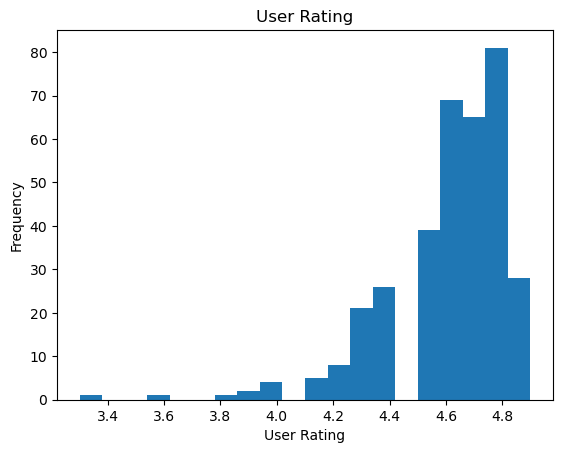

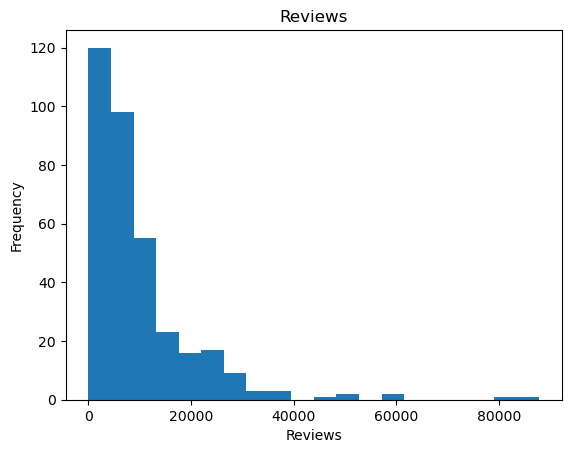

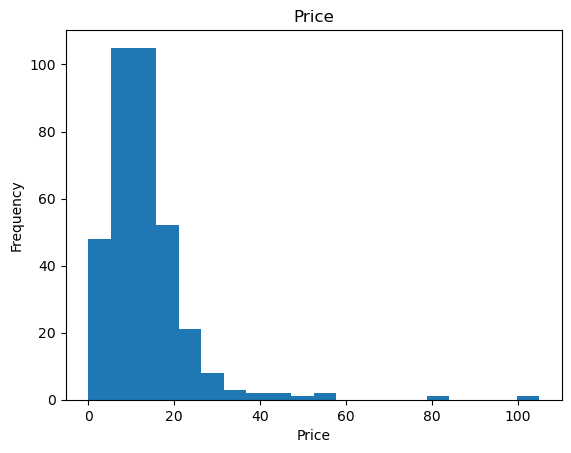

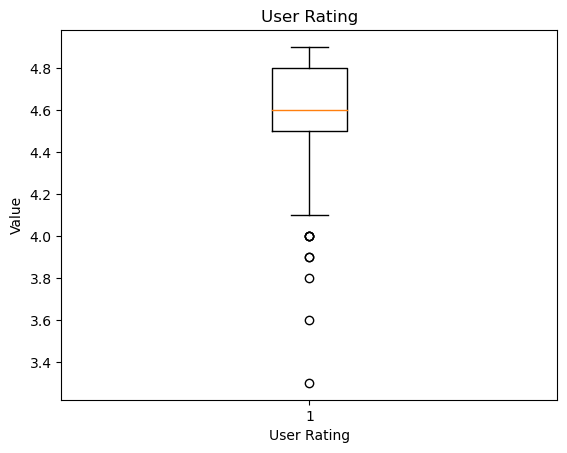

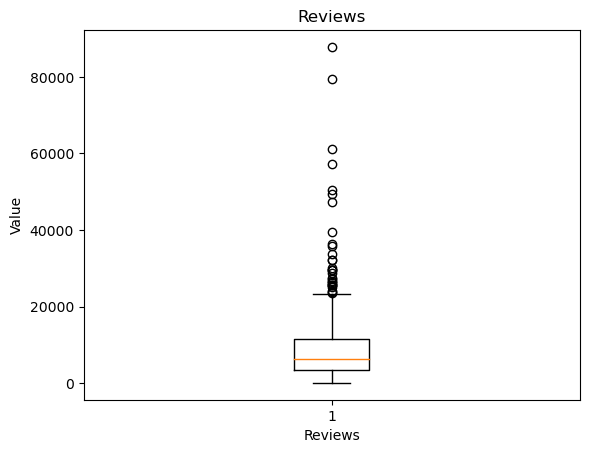

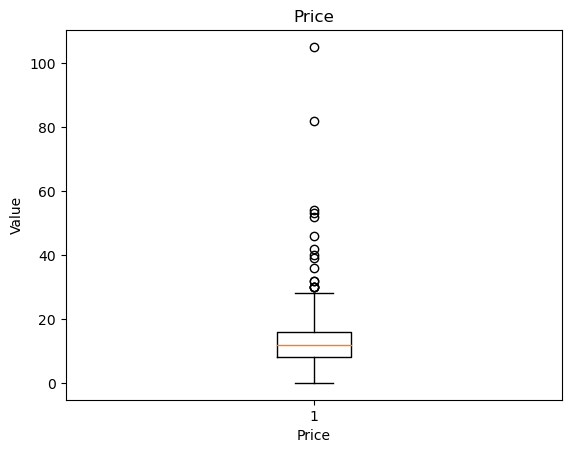

In [70]:
import matplotlib.pyplot as plt
continuous_cols = ['User Rating', 'Reviews', 'Price']

# histograms for each variable
for col in continuous_cols:
    plt.hist(df2[col], bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# boxplots for each variable
for col in continuous_cols:
    plt.boxplot(df2[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()



Something I believe is important to note regarding this set is some of the statistics that follow. Using the code below, one can see important details such as the minimum and maximum of each of the variables, revealing insight into exact numbers of ranges. Other details, such as standard deviations and the means are also useful to gaining better insight into the book data. For example, it is interesting to see that while the mean of user ratings is 4.6, the lowest is actually 3.3.

In [71]:
df2.describe()

,User Rating,Reviews,Price,Year,Fiction,Non Fiction
count,351.000000,351.000000,351.000000,351.00000,351.000000,351.000000
mean,4.608832,9799.683761,13.076923,2013.51567,0.455840,0.544160
std,0.226669,10871.356548,10.050860,3.28271,0.498757,0.498757
min,3.300000,37.000000,0.000000,2009.00000,0.000000,0.000000
25%,4.500000,3442.500000,8.000000,2010.00000,0.000000,0.000000
50%,4.600000,6346.000000,12.000000,2013.00000,0.000000,1.000000
75%,4.800000,11470.500000,16.000000,2016.00000,1.000000,1.000000
max,4.900000,87841.000000,105.000000,2019.00000,1.000000,1.000000


Data Dictionary:



<!-- Variable       Description                                              Data Type     More Notes    

Name           Name/Title of the book                                    String                                 
Author         Author of the book                                        String                                 
User Rating    Amazon user rating                                        Float        Ranges from 0-5                
Reviews        Number of written reviews on Amazon                       Integer                                
Price          Price of the book as of 2020                              Integer      Currency (USD)            
Year           The year it ranked on the bestseller list first           Integer                                
Fiction        Genre of the book                                         Integer      Categories: 1-yes, 0-no
Non-fiction    Genre of the book                                         Integer      Categories: 1-yes, 0-no -->


| Variable     | Description                                              | Data Type | More Notes            |
|--------------|----------------------------------------------------------|-----------|-----------------------|
| Name         | Name/Title of the book                                   | String    |                       |
| Author       | Author of the book                                       | String    |                       |
| User Rating  | Amazon user rating                                       | Float     | Ranges from 0-5       |
| Reviews      | Number of written reviews on Amazon                      | Integer   |                       |
| Price        | Price of the book as of 2020                             | Integer   | Currency (USD)        |
| Year         | The year it ranked on the bestseller list first          | Integer   |                       |
| Fiction      | Genre of the book                                        | Integer   | Categories: 1-yes, 0-no |
| Non-fiction  | Genre of the book                                        | Integer   | Categories: 1-yes, 0-no |


UI components I could include in my dashboard based on this information include:
- dropdown menus to select certain categories like genres and years
    - some can be multi-select to allow for more than one comparison
- slider controls to go between certain years or even certain price points
- range slider for multiple years
- buttons to switch between certain graphs or kinds of book information
- check boxes to select a genre
- check boxes to select certain price ranges
- date picker for manually entering
- tabs for switching between the genre


Some possible data visualizations include a pie chart showing the bestsellers by fiction or non-fiction to show the distribution. It could be interesting to see which category it tends to lean more towards. Another visualization could be a scatter plot of book ratings and the number of reviews and it could be filtered on the year it was a bestseller using a drop down menu. Another visualization I could include is a line chart showing the number of reviews for each of the years. There could also be different colored lines here for non-fiction and fiction (can be shown using checkboxes so user can decide what to display). Another visualization could be a bar chart of the number of books and their price ranges.